In [2]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time

In [3]:
df = pd.read_excel("C:/Users/user/Downloads/미니프로젝트-쇼핑몰 실습데이터.xlsx")

In [4]:
list1 = []
for i in range(218601):
    x = df['주문일자'][i]
    list1 += [x.date()]

In [5]:
list2 = []
for i in range(218601):
    x = list1[i]
    y = x.month
    list2 += [y]

In [6]:
df['주문연월'] = list2

In [7]:
df

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,주문연월
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN,12
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN,12
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN,12
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,12
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN,11
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN,11
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N,NaN,NaN,11
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N,NaN,NaN,11


In [8]:
df2 = df.copy()

In [9]:
df2 = df2[df2['처리상태'] == '구매확정']

In [10]:
df2

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,주문연월
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN,12
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN,12
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN,12
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,12
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217852,221106231538662,다우기술,[올리브영] 기프트카드 1만원권,올리브영,2,19200,신용카드,2022-11-06 23:13:17,구매확정,N,NaN,NaN,11
217914,221107074704768,다우기술,[따뜻달달특가] 빽다방-빽′s카페라떼(HOT),빽다방,1,2550,신용카드,2022-11-07 07:44:43,구매확정,N,NaN,NaN,11
217927,221107081217959,다우기술,[GS25] 모바일 상품권 2천원권,GS25,1,1800,신 + 포,2022-11-07 08:09:57,구매확정,N,NaN,NaN,11
217938,221107083418760,다우기술,[이디야] 연유 카페라떼 HOT,이디야,1,3400,포인트,2022-11-07 08:31:57,구매확정,N,NaN,NaN,11


<BarContainer object of 159291 artists>

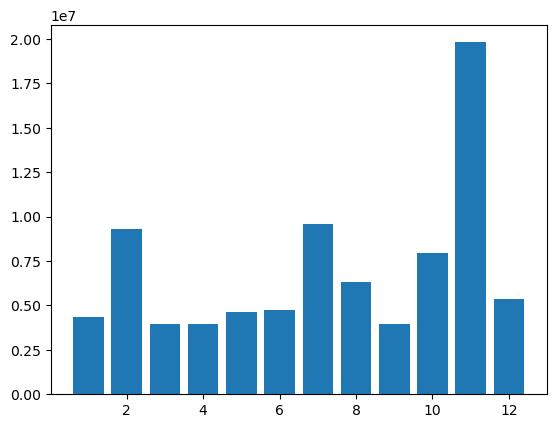

In [11]:
plt.bar(df2['주문연월'], df2['판매금액'])